In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
55897,1002605,P00174442,M,36-45,7,C,0,1,5,NaN,NaN,7045
540657,1005256,P00274142,M,26-35,16,B,4+,1,1,NaN,NaN,15222
94696,1002638,P00003442,M,26-35,14,B,2,0,4,5.0,8.0,3507
8288,1001276,P00319342,M,36-45,17,B,2,0,5,8.0,NaN,8870
332503,1003272,P00248142,M,36-45,0,B,1,0,5,NaN,NaN,8775


In [4]:
df_clean = df.copy()

In [5]:
df_clean.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df_clean.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
del df_clean['Product_Category_2']
del df_clean['Product_Category_3']

In [9]:
df_clean.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [10]:
df_clean.rename(columns={'Product_Category_1':'Product_Category'},inplace=True)

In [11]:
df_clean.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [12]:
df_clean.duplicated().sum()

0

In [31]:
df_clean['User_ID'] = df_clean['User_ID'].astype('object')

In [49]:
df_clean['Marital_Status'] = df_clean['Marital_Status'].astype('object')

In [56]:
df_clean['Product_Category'] = df_clean['Product_Category'].astype('object')

In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


In [68]:
df_clean['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

### Distribution of Purchase

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


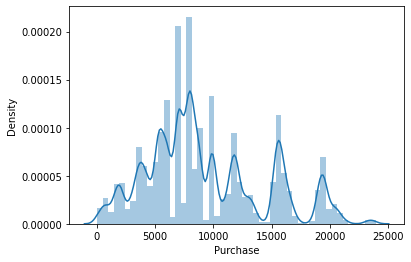

In [13]:
sns.distplot(x = df_clean['Purchase'])
plt.xlabel('Purchase')
plt.show()

### Highest 10 user_Id repeated ?

In [14]:
Top_User = df_clean['User_ID'].value_counts().nlargest(10)

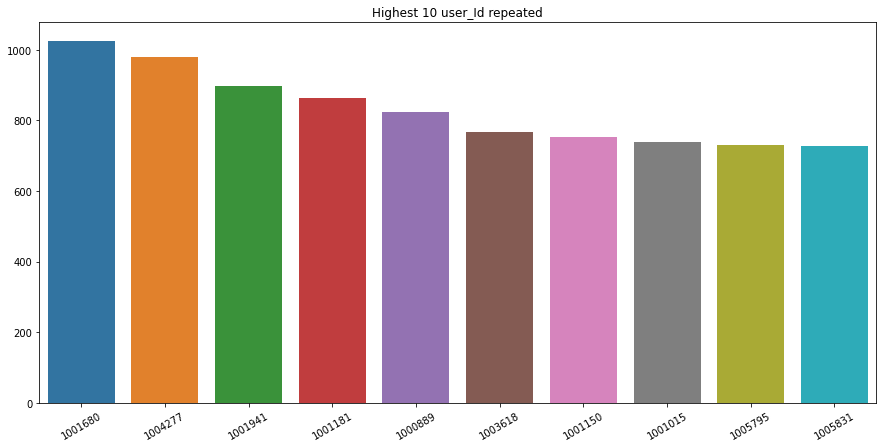

In [15]:
plt.figure(figsize=(15,7))
plt.title('Highest 10 user_Id repeated')
plt.xticks(rotation = 30)
sns.barplot(data = df_clean,x = Top_User.index , y = Top_User.values , order=Top_User.index)
plt.show()

###  Highest 10 Product_ID repeated ?

In [16]:
Top_product = df_clean['Product_ID'].value_counts().nlargest(10)

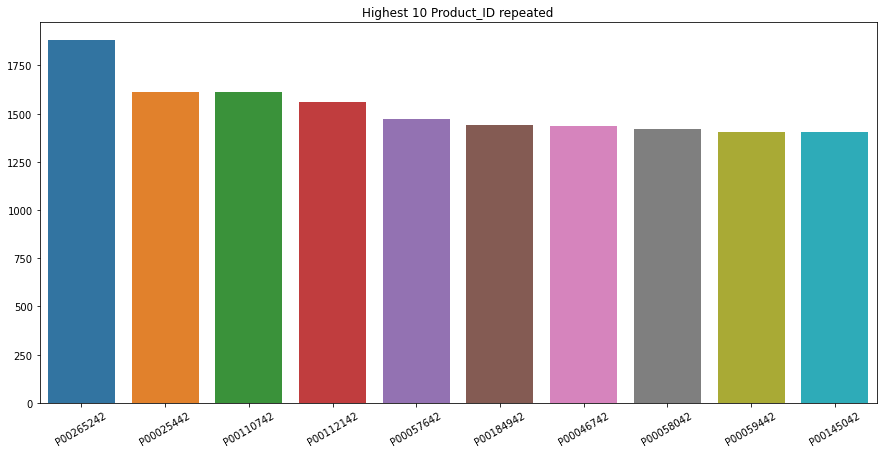

In [17]:
plt.figure(figsize=(15,7))
plt.title('Highest 10 Product_ID repeated')
plt.xticks(rotation = 30)
sns.barplot(data = df_clean,x = Top_product.index , y = Top_product.values , order= Top_product.index)
plt.show()

###  highest product id are purchased ?

In [18]:
Top_Id_purchased = df_clean.groupby('Product_ID')['Purchase'].sum().sort_values(ascending  = False).head(10)

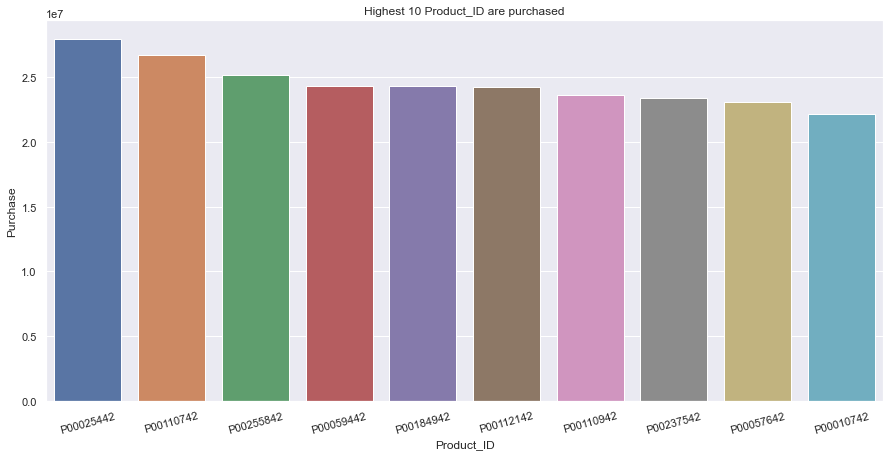

In [19]:
sns.set(rc = {'figure.figsize':(15,7)})
plt.title('Highest 10 Product_ID are purchased')
plt.xticks(rotation = 15)
plt.ylabel('Purchase')
sns.barplot(data = df_clean,x = Top_Id_purchased.index , y = Top_Id_purchased.values)
plt.show()

### Gender vs Purchase ?

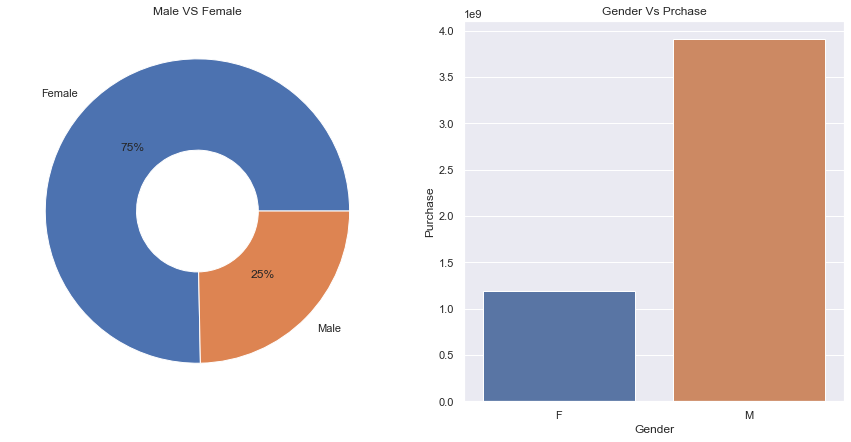

In [20]:
plt.subplot(1,2,1)
y = df_clean['Gender'].value_counts()
plt.title("Male VS Female")
plt.pie(data = df_clean , x = y , wedgeprops={'width':0.6} , labels = ['Female' , 'Male'],autopct='%0.f%%')


plt.subplot(1,2,2)
x = df_clean.groupby('Gender')['Purchase'].sum()
plt.ylabel('Purchase')
sns.barplot(data = df_clean , x = x.index ,y = x.values)
plt.title('Gender Vs Prchase')

plt.show()

### Outliers in Purchase

<AxesSubplot:xlabel='Purchase'>

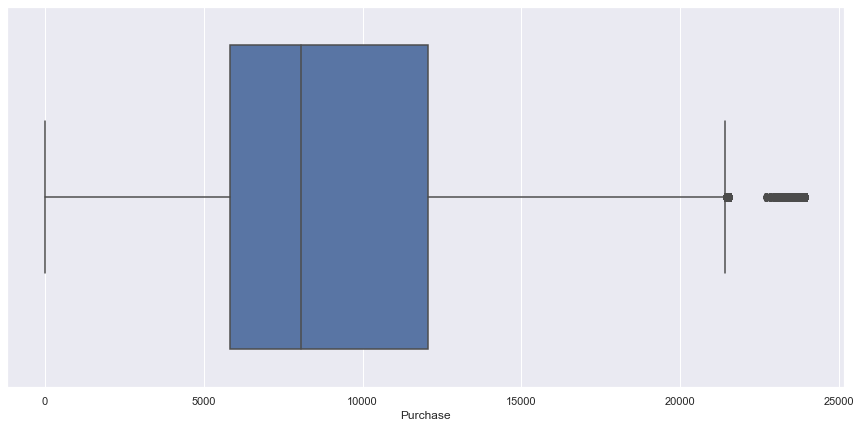

In [21]:
sns.boxplot(x = 'Purchase',data = df_clean)

### Age Vs Purchase

Text(0.5, 1.0, 'Age Vs Prchase')

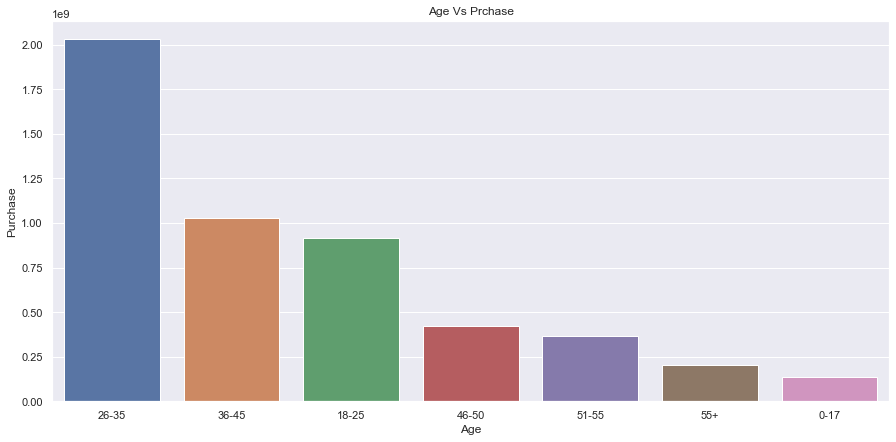

In [22]:
x = df_clean.groupby('Age')['Purchase'].sum().sort_values(ascending = False)
plt.ylabel('Purchase')
sns.barplot(data = df_clean , x = x.index ,y = x.values)
plt.title('Age Vs Prchase')

### City Category 

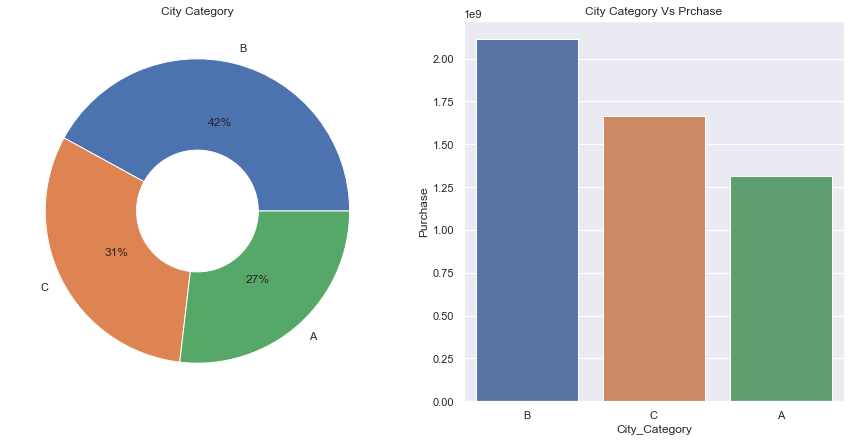

In [23]:
plt.subplot(1,2,1)
y = df_clean['City_Category'].value_counts()
plt.title("City Category")
plt.pie(data = df_clean , x = y , wedgeprops={'width':0.6} , labels = ['B' , 'C','A'],autopct='%0.f%%')

plt.subplot(1,2,2)
x = df_clean.groupby('City_Category')['Purchase'].sum().sort_values(ascending = False)
plt.ylabel('Purchase')
sns.barplot(data = df_clean , x = x.index ,y = x.values)
plt.title('City Category Vs Prchase')
plt.show()


### Product_category vs Purchased

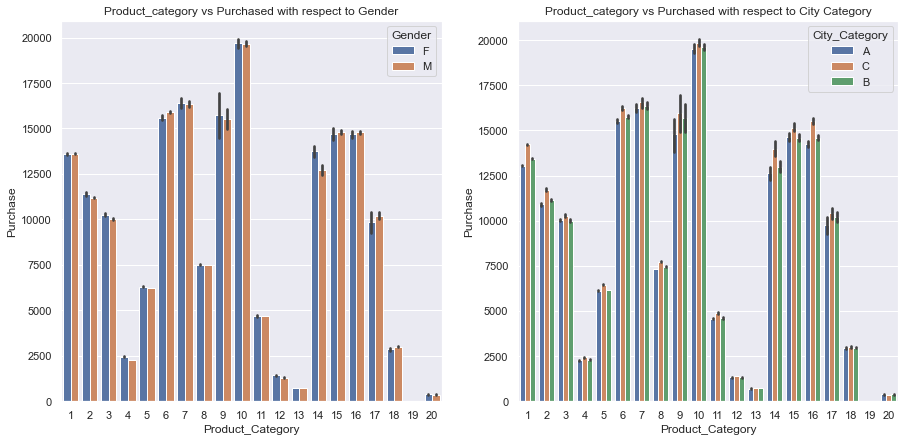

In [24]:
plt.subplot(1,2,1)
plt.title('Product_category vs Purchased with respect to Gender')
sns.barplot(data=df_clean , x  = 'Product_Category' , y = 'Purchase' , hue= 'Gender')

plt.subplot(1,2,2)
plt.title('Product_category vs Purchased with respect to City Category')
sns.barplot(data=df_clean , x  = 'Product_Category' , y = 'Purchase' , hue= 'City_Category')
plt.show()

In [65]:
df_clean.to_csv('Clean1')